In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Copy-of-Student-Employability-Datasets.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,certifications,workshops,Student Performance Rating,CLASS,Suggested Job Role
0,Student 1,4,5,4,5,5,5,5,shell programming,cloud computing,5,Employable,Database Developer
1,Student 2,4,4,4,4,4,4,3,machine learning,database security,5,Employable,Portal Administrator
2,Student 3,4,3,3,3,3,3,2,app development,web technologies,5,LessEmployable,Portal Administrator
3,Student 4,3,3,3,2,3,3,3,python,data science,5,LessEmployable,Systems Security Administrator
4,Student 5,4,4,3,3,4,4,3,app development,cloud computing,5,Employable,Business Systems Analyst


In [6]:
data.tail()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,certifications,workshops,Student Performance Rating,CLASS,Suggested Job Role
2977,Student 2996,4,3,3,3,3,3,2,distro making,system designing,5,Employable,Information Technology Auditor
2978,Student 2997,3,4,4,4,4,4,4,r programming,system designing,5,Employable,Project Manager
2979,Student 2998,4,5,4,5,4,4,4,app development,database security,5,Employable,Technical Support
2980,Student 2999,4,4,4,3,4,4,3,distro making,data science,5,LessEmployable,Software Quality Assurance (QA) / Testing
2981,Student 3000,4,4,4,4,3,4,4,information security,data science,5,Employable,Technical Support


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   certifications              2982 non-null   object
 9   workshops                   2982 non-null   object
 10  Student Performance Rating  2982 non-null   int64 
 11  CLASS                       2982 non-null   object
 12  Suggested Job Role          2982 non-null   object
dtypes: int64(8), object(5)
memory usage: 303.0+ KB


In [8]:
data.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
data.shape

(2982, 13)

In [10]:
data.columns

Index(['Name of Student', 'GENERAL APPEARANCE', 'MANNER OF SPEAKING',
       'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE',
       'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS', 'certifications',
       'workshops', 'Student Performance Rating', 'CLASS',
       'Suggested Job Role'],
      dtype='object')

In [11]:
data['workshops'].unique()

array(['cloud computing', 'database security', 'web technologies',
       'data science', 'testing', 'hacking', 'game development',
       'system designing'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [13]:
data['workshops_encode']=Label_Encoder.fit_transform(data['workshops'])

In [14]:
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,certifications,workshops,Student Performance Rating,CLASS,Suggested Job Role,workshops_encode
0,Student 1,4,5,4,5,5,5,5,shell programming,cloud computing,5,Employable,Database Developer,0
1,Student 2,4,4,4,4,4,4,3,machine learning,database security,5,Employable,Portal Administrator,2
2,Student 3,4,3,3,3,3,3,2,app development,web technologies,5,LessEmployable,Portal Administrator,7
3,Student 4,3,3,3,2,3,3,3,python,data science,5,LessEmployable,Systems Security Administrator,1
4,Student 5,4,4,3,3,4,4,3,app development,cloud computing,5,Employable,Business Systems Analyst,0


In [15]:
data['certifications'].unique()

array(['shell programming', 'machine learning', 'app development',
       'python', 'r programming', 'information security', 'hadoop',
       'distro making', 'full stack'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [17]:
data['certifications_encode']=Label_Encoder.fit_transform(data['certifications'])

In [18]:
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,certifications,workshops,Student Performance Rating,CLASS,Suggested Job Role,workshops_encode,certifications_encode
0,Student 1,4,5,4,5,5,5,5,shell programming,cloud computing,5,Employable,Database Developer,0,8
1,Student 2,4,4,4,4,4,4,3,machine learning,database security,5,Employable,Portal Administrator,2,5
2,Student 3,4,3,3,3,3,3,2,app development,web technologies,5,LessEmployable,Portal Administrator,7,0
3,Student 4,3,3,3,2,3,3,3,python,data science,5,LessEmployable,Systems Security Administrator,1,6
4,Student 5,4,4,3,3,4,4,3,app development,cloud computing,5,Employable,Business Systems Analyst,0,0


In [19]:
data['Suggested Job Role'].unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

In [20]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [22]:
data['Suggested Job Role_encode']=Label_Encoder.fit_transform(data['Suggested Job Role'])

In [23]:
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,certifications,workshops,Student Performance Rating,CLASS,Suggested Job Role,workshops_encode,certifications_encode,Suggested Job Role_encode
0,Student 1,4,5,4,5,5,5,5,shell programming,cloud computing,5,Employable,Database Developer,0,8,7
1,Student 2,4,4,4,4,4,4,3,machine learning,database security,5,Employable,Portal Administrator,2,5,18
2,Student 3,4,3,3,3,3,3,2,app development,web technologies,5,LessEmployable,Portal Administrator,7,0,18
3,Student 4,3,3,3,2,3,3,3,python,data science,5,LessEmployable,Systems Security Administrator,1,6,28
4,Student 5,4,4,3,3,4,4,3,app development,cloud computing,5,Employable,Business Systems Analyst,0,0,2


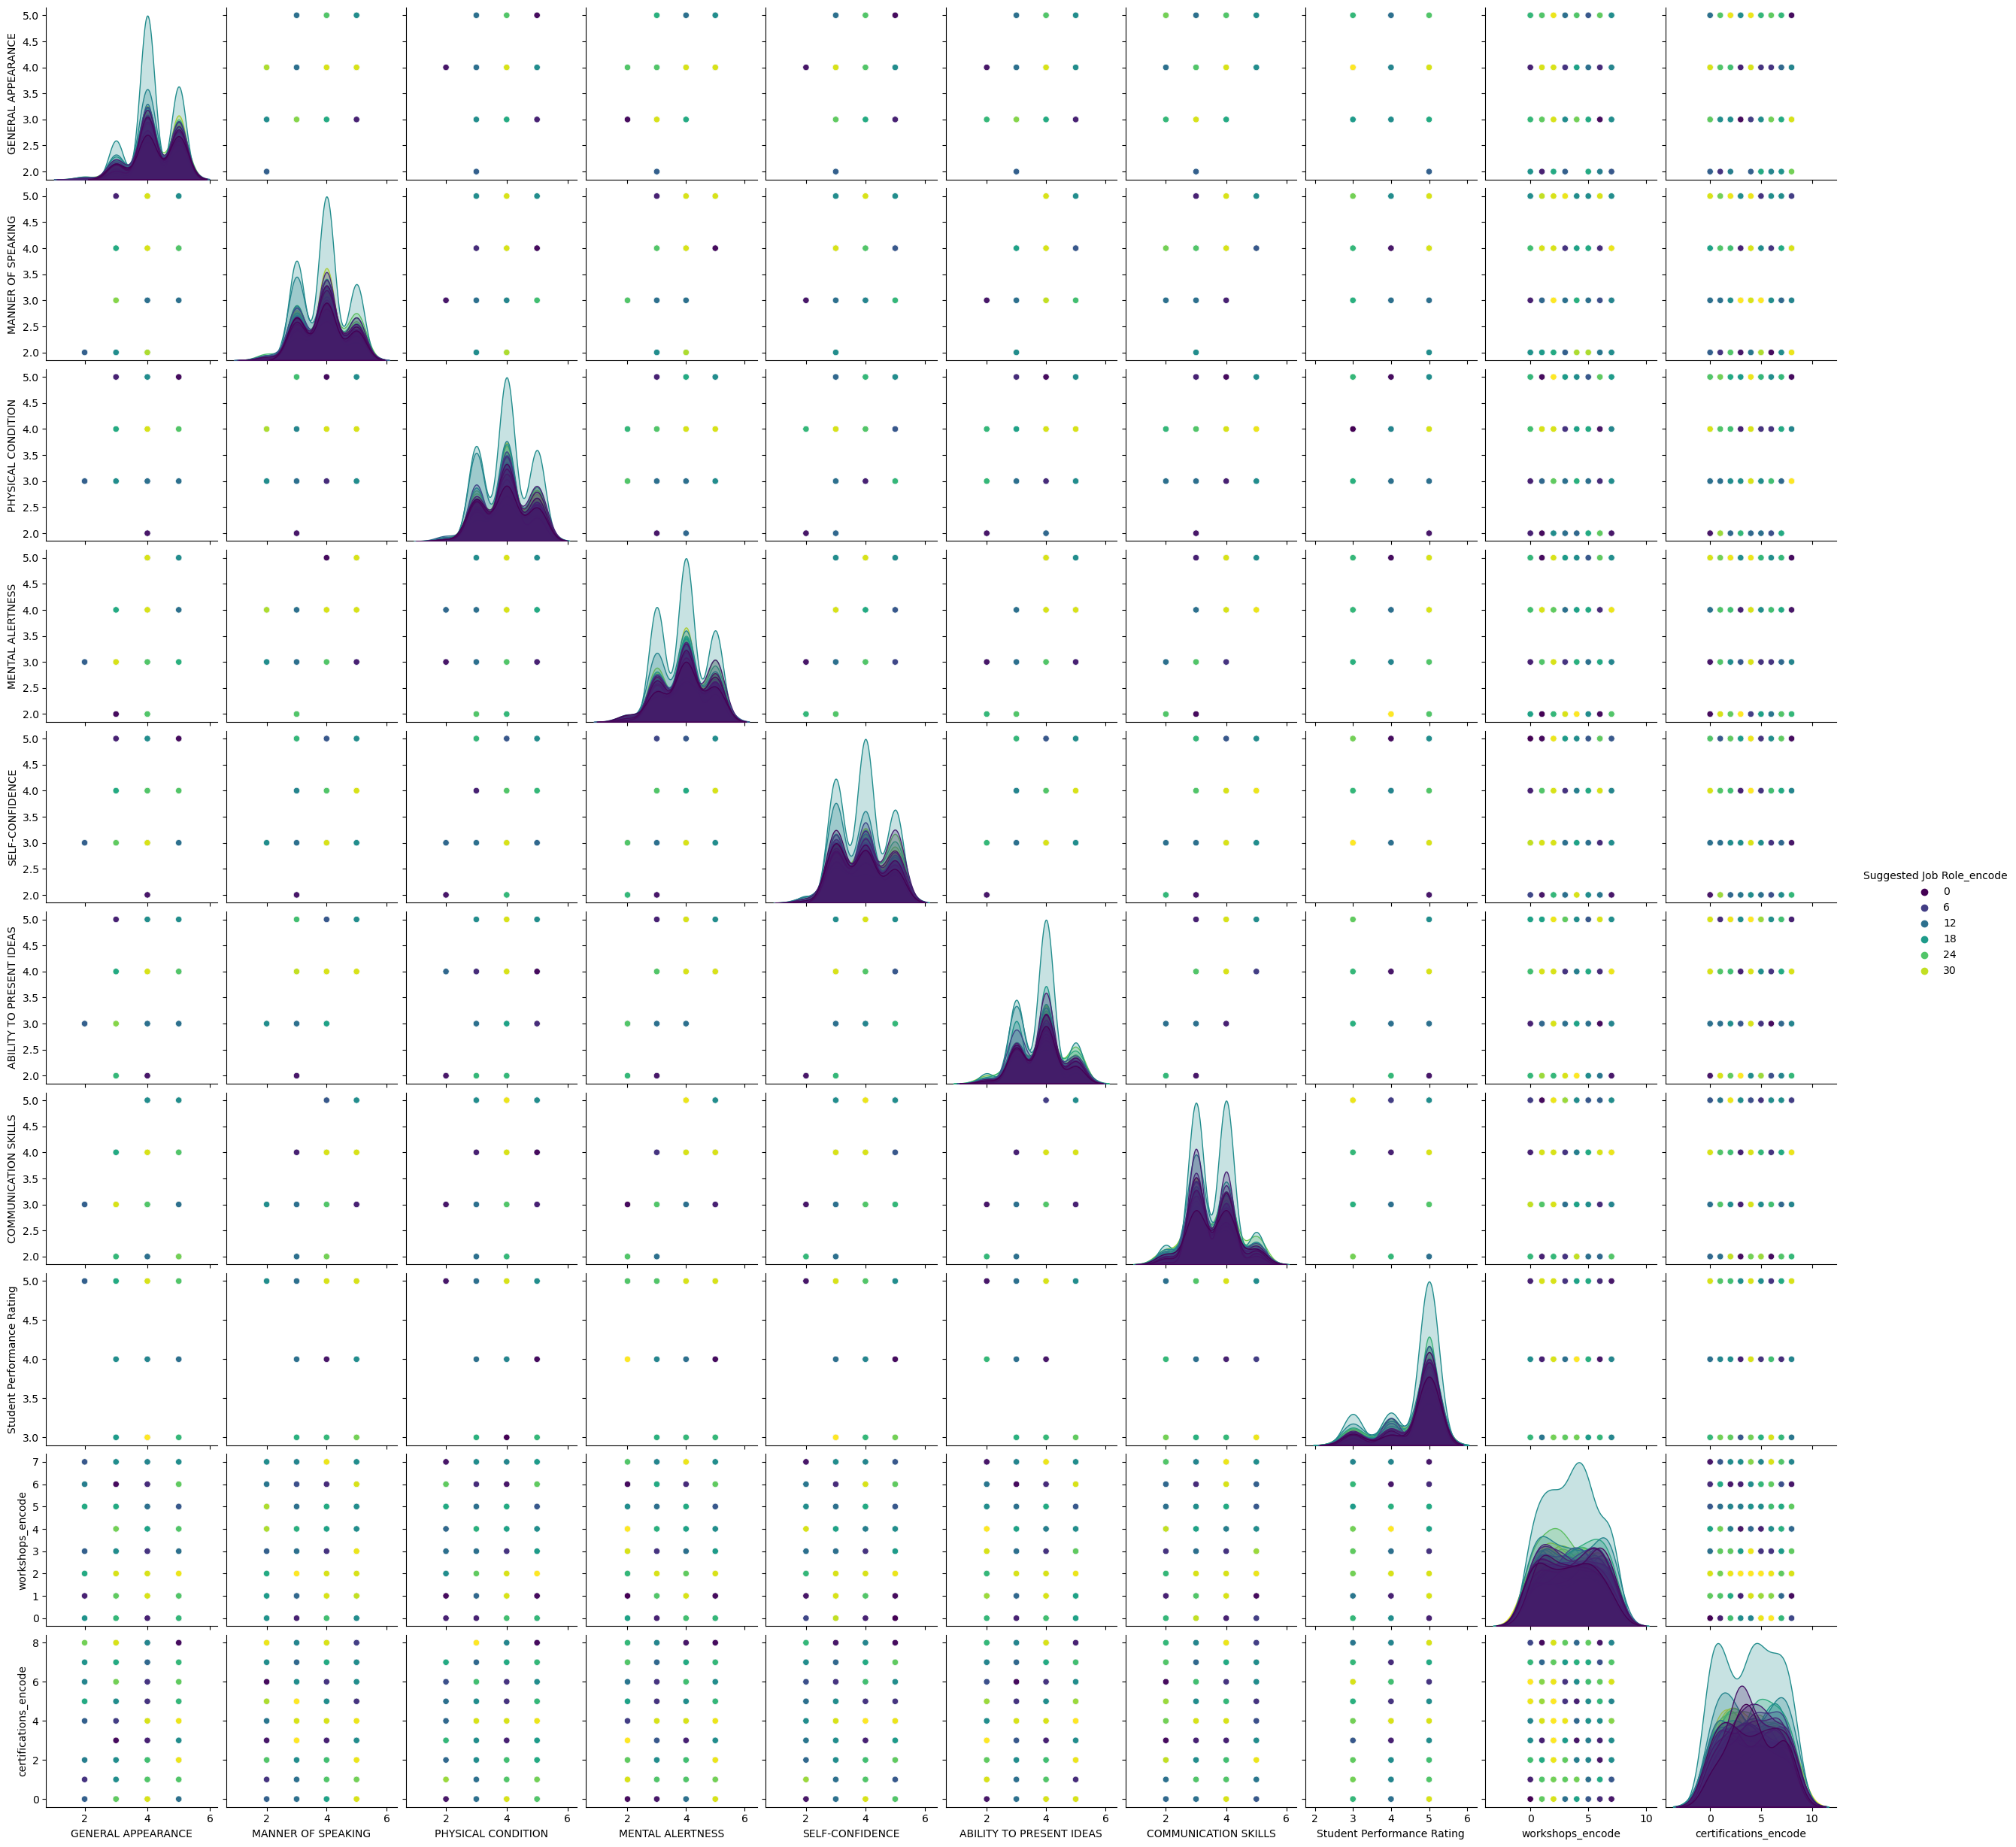

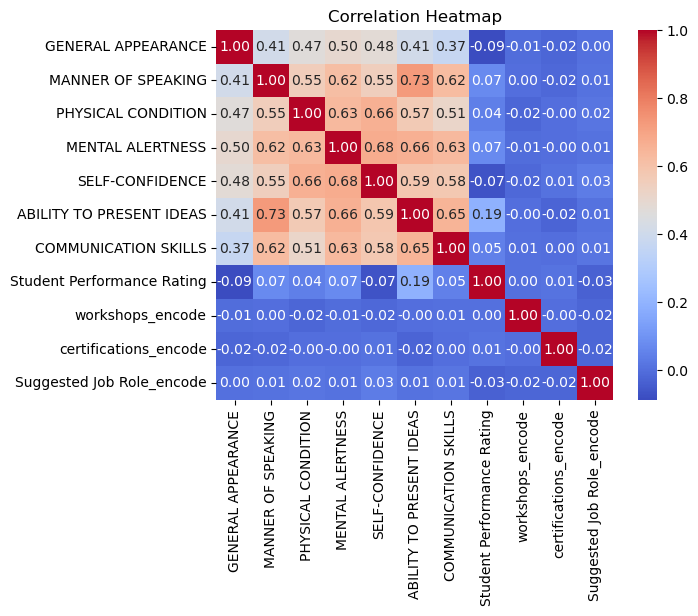

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plot
sns.pairplot(data, hue='Suggested Job Role_encode', palette='viridis')
plt.show()

# Create correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [35]:
X=data[["GENERAL APPEARANCE","MANNER OF SPEAKING","PHYSICAL CONDITION","MENTAL ALERTNESS","SELF-CONFIDENCE","ABILITY TO PRESENT IDEAS","COMMUNICATION SKILLS"]]
y=data['CLASS']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
model = RandomForestClassifier()


In [38]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
predictions = model.predict(X_test)

In [40]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8425460636515912
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.82      0.93      0.87       346
LessEmployable       0.88      0.73      0.79       251

      accuracy                           0.84       597
     macro avg       0.85      0.83      0.83       597
  weighted avg       0.85      0.84      0.84       597



In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
print("Confusion matrix:\n",confusion_matrix(y_test,predictions))

Confusion matrix:
 [[321  25]
 [ 69 182]]


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression()


logistic_model.fit(X_train, y_train)


LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8391959798994975
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.82      0.91      0.86       332
LessEmployable       0.87      0.75      0.81       265

      accuracy                           0.84       597
     macro avg       0.84      0.83      0.83       597
  weighted avg       0.84      0.84      0.84       597



In [49]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree_model = DecisionTreeClassifier()

In [53]:

tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [54]:
y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.8358458961474037
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.81      0.92      0.86       332
LessEmployable       0.88      0.73      0.80       265

      accuracy                           0.84       597
     macro avg       0.84      0.83      0.83       597
  weighted avg       0.84      0.84      0.83       597



In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
svm_model = SVC(kernel='linear', random_state=42)

In [63]:

svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [64]:

y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.5561139028475712
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.56      1.00      0.71       332
LessEmployable       0.00      0.00      0.00       265

      accuracy                           0.56       597
     macro avg       0.28      0.50      0.36       597
  weighted avg       0.31      0.56      0.40       597

